# Previsão de demandas no varejo

Toda base pode ser consultada em [kagle](https://www.kaggle.com/datasets/tevecsystems/retail-sales-forecasting/data)

### Carrega dados.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mock_kaggle.csv to mock_kaggle.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('mock_kaggle.csv')

In [ ]:
df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [ ]:
df.describe()

,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


In [ ]:
df.columns

Index(['data', 'venda', 'estoque', 'preco'], dtype='object')

In [ ]:
df.isna().sum()

,0
data,0
venda,0
estoque,0
preco,0


In [ ]:
print(df.head)

<bound method NDFrame.head of            data  venda  estoque  preco
0    2014-01-01      0     4972   1.29
1    2014-01-02     70     4902   1.29
2    2014-01-03     59     4843   1.29
3    2014-01-04     93     4750   1.29
4    2014-01-05     96     4654   1.29
..          ...    ...      ...    ...
932  2016-07-27     98     3179   2.39
933  2016-07-28    108     3071   2.39
934  2016-07-29    128     4095   2.39
935  2016-07-30    270     3825   2.39
936  2016-07-31    183     3642   2.39

[937 rows x 4 columns]>


In [ ]:
df['data'] = pd.to_datetime(df['data'])

# Criar variáveis temporais úteis
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day
df['dia_semana'] = df['data'].dt.dayofweek  # 0 = segunda, 6 = domingo

In [ ]:
df.head()

,data,venda,estoque,preco,ano,mes,dia,dia_semana
0,2014-01-01,0,4972,1.29,2014,1,1,2
1,2014-01-02,70,4902,1.29,2014,1,2,3
2,2014-01-03,59,4843,1.29,2014,1,3,4
3,2014-01-04,93,4750,1.29,2014,1,4,5
4,2014-01-05,96,4654,1.29,2014,1,5,6


In [ ]:
import matplotlib.pyplot as plt

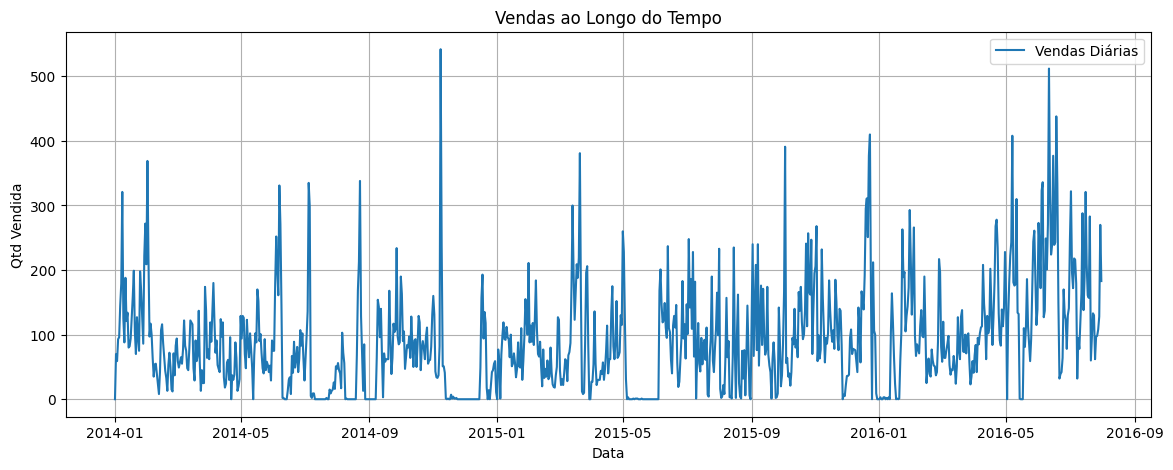

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df['data'], df['venda'], label='Vendas Diárias')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Qtd Vendida')
plt.grid(True)
plt.legend()
plt.show()


### Modelagem


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Selecionar as features (sem incluir a data original)
features = ['estoque', 'preco', 'ano', 'mes', 'dia', 'dia_semana']
target = 'venda'

# Separar em treino e teste
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prever e avaliar
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"MAE do modelo: {mae:.2f}")


MAE do modelo: 41.58


##### Interpretação rápida

Quanto menor o MAE, melhor a performance.

A ideia é mostrar que mesmo com features simples, conseguimos prever a demanda com certa precisão.

Esse modelo pode ser melhorado com mais dados ou otimização de hiperparâmetros depois.

In [ ]:
import seaborn as sns

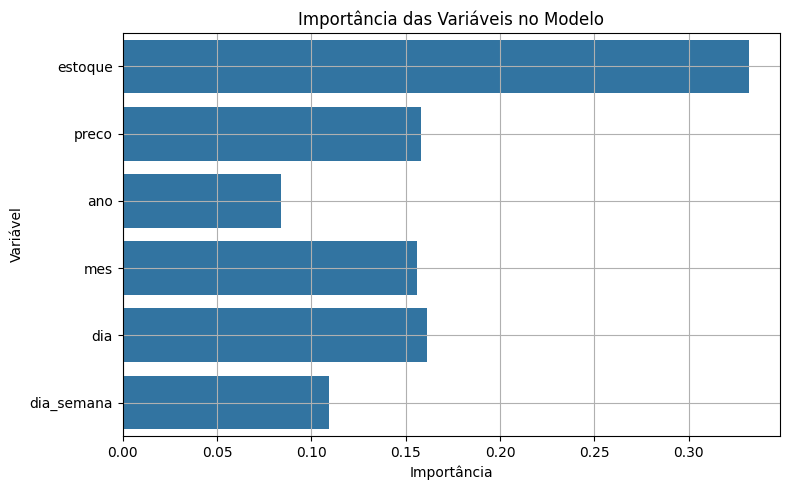

In [ ]:
# Obter importância das variáveis
importancias = model.feature_importances_
nomes_features = X.columns

# Plotar
plt.figure(figsize=(8, 5))
sns.barplot(x=importancias, y=nomes_features)
plt.title('Importância das Variáveis no Modelo')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(True)
plt.tight_layout()
plt.show()


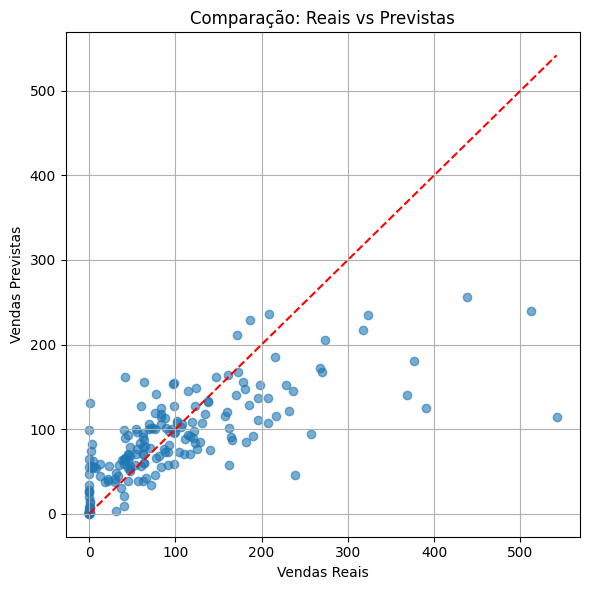

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Vendas Reais')
plt.ylabel('Vendas Previstas')
plt.title('Comparação: Reais vs Previstas')
plt.grid(True)
plt.tight_layout()
plt.show()


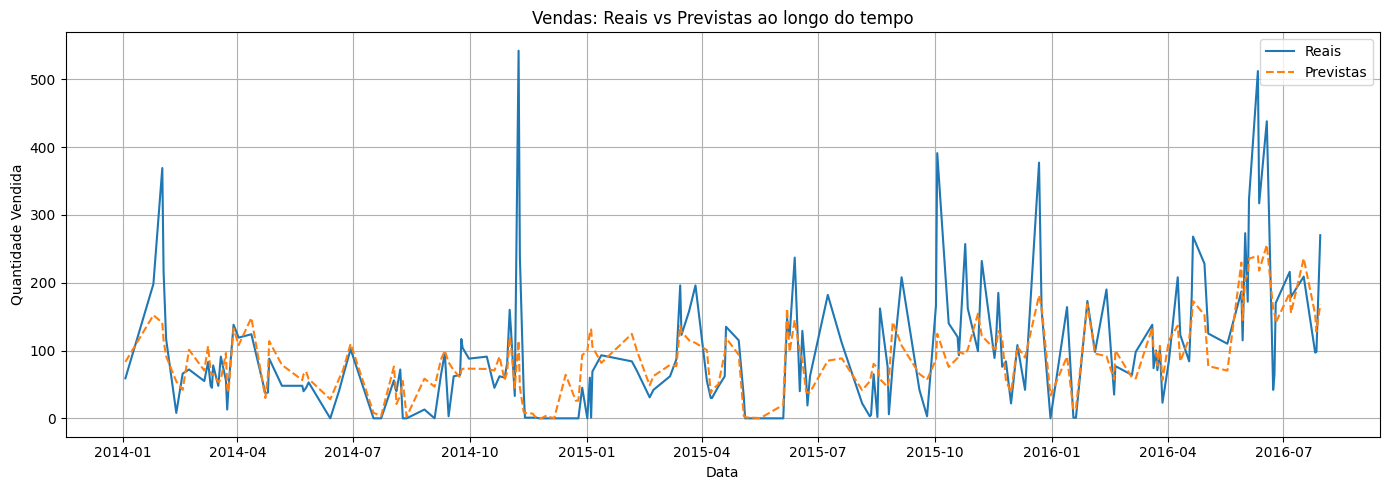

In [ ]:
# Pegar subconjunto das previsões e datas reais
df_resultado = pd.DataFrame({
    'data': df.loc[y_test.index, 'data'],
    'vendas_reais': y_test.values,
    'vendas_previstas': y_pred
}).sort_values(by='data')

# Plotar
plt.figure(figsize=(14, 5))
plt.plot(df_resultado['data'], df_resultado['vendas_reais'], label='Reais')
plt.plot(df_resultado['data'], df_resultado['vendas_previstas'], label='Previstas', linestyle='--')
plt.title('Vendas: Reais vs Previstas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
